In [1]:
import numpy as np
import pandas as pd

In [12]:
import yfinance as yf
aapl_data = yf.download("AAPL", start="2020-01-01", end="2025-05-31")

[*********************100%***********************]  1 of 1 completed


In [13]:
aapl_data 

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.620819,72.681266,71.373196,71.627069,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487831,72.526518,70.783234,71.034694,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307533,73.609768,71.849555,71.849555,132079200
...,...,...,...,...,...
2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500


In [14]:
aapl_data.columns

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])

In [15]:
df = aapl_data.copy()

In [16]:
df.columns = df.columns.get_level_values(0)

In [17]:
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.620819,72.681266,71.373196,71.627069,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487831,72.526518,70.783234,71.034694,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307533,73.609768,71.849555,71.849555,132079200
...,...,...,...,...,...
2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500
2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700


In [18]:
df.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [19]:
df.index.name = 'Date'

In [20]:
df

Price,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.620819,72.681266,71.373196,71.627069,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487831,72.526518,70.783234,71.034694,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307533,73.609768,71.849555,71.849555,132079200
...,...,...,...,...,...
2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500
2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700


In [21]:
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

In [22]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.620819,72.681266,71.373196,71.627069,135480400
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800
2020-01-06,72.487831,72.526518,70.783234,71.034694,118387200
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000
2020-01-08,73.307533,73.609768,71.849555,71.849555,132079200
...,...,...,...,...,...
2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500
2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700


In [23]:
for lag in range(1, 6):
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)

In [24]:
for window in [3, 7, 14]:
    df[f'Close_roll_mean_{window}'] = df['Close'].rolling(window).mean()
    df[f'Close_roll_std_{window}'] = df['Close'].rolling(window).std()

In [25]:
df['High_Low_diff'] = df['High'] - df['Low']
df['Close_Open_diff'] = df['Close'] - df['Open']

In [26]:
df = df.fillna(0)

In [27]:
df

,Close,High,Low,Open,Volume,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_4,Close_lag_5,Close_roll_mean_3,Close_roll_std_3,Close_roll_mean_7,Close_roll_std_7,Close_roll_mean_14,Close_roll_std_14,High_Low_diff,Close_Open_diff
Date,,,,,,,,,,,,,,,,,,
2020-01-02,72.620819,72.681266,71.373196,71.627069,135480400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.308070,0.993750
2020-01-03,71.914810,72.676439,71.689950,71.847110,146322800,72.620819,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.986489,0.067700
2020-01-06,72.487831,72.526518,70.783234,71.034694,118387200,71.914810,72.620819,0.000000,0.000000,0.000000,72.341153,0.375164,0.000000,0.000000,0.000000,0.000000,1.743284,1.453137
2020-01-07,72.146942,72.753823,71.926915,72.497529,108872000,72.487831,71.914810,72.620819,0.000000,0.000000,72.183194,0.288225,0.000000,0.000000,0.000000,0.000000,0.826909,-0.350587
2020-01-08,73.307533,73.609768,71.849555,71.849555,132079200,72.146942,72.487831,71.914810,72.620819,0.000000,72.647436,0.596530,0.000000,0.000000,0.000000,0.000000,1.760212,1.457978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-23,195.270004,197.699997,193.460007,193.669998,78432900,201.360001,202.089996,206.860001,208.779999,211.259995,199.573334,3.744624,205.295713,5.976571,204.490311,6.758257,4.239990,1.600006
2025-05-27,200.210007,200.740005,197.429993,198.300003,56288500,195.270004,201.360001,202.089996,206.860001,208.779999,198.946671,3.235588,203.690000,5.541621,204.630310,6.638279,3.310013,1.910004
2025-05-28,200.419998,202.729996,199.899994,200.589996,45339700,200.210007,195.270004,201.360001,202.089996,206.860001,198.633336,2.914623,202.141429,4.488114,204.946526,6.291576,2.830002,-0.169998


In [28]:
train_size = int(0.8 * len(df))
train = df.iloc[:train_size]
test = df.iloc[train_size:]

X_train = train.drop(columns=['Close'])
y_train = train['Close']
X_test = test.drop(columns=['Close'])
y_test = test['Close']

In [29]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = XGBRegressor(n_estimators=500, learning_rate=0.05, max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluation
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")


RMSE: 30.4976
MAE: 26.0453
R2 Score: -1.8084


In [30]:
import pandas as pd
import numpy as np

df = df[['Close', 'High', 'Low', 'Open', 'Volume']].copy()
df = df.reset_index()
df.columns = ['time_idx', 'Close', 'High', 'Low', 'Open', 'Volume']

df['time_idx'] = pd.to_datetime(df['time_idx'])
df['time_idx'] = (df['time_idx'] - df['time_idx'].min()).dt.days

df['stock'] = 'AAPL'


In [31]:
df

,time_idx,Close,High,Low,Open,Volume,stock
0,0,72.620819,72.681266,71.373196,71.627069,135480400,AAPL
1,1,71.914810,72.676439,71.689950,71.847110,146322800,AAPL
2,4,72.487831,72.526518,70.783234,71.034694,118387200,AAPL
3,5,72.146942,72.753823,71.926915,72.497529,108872000,AAPL
4,6,73.307533,73.609768,71.849555,71.849555,132079200,AAPL
...,...,...,...,...,...,...,...
1355,1968,195.270004,197.699997,193.460007,193.669998,78432900,AAPL
1356,1972,200.210007,200.740005,197.429993,198.300003,56288500,AAPL
1357,1973,200.419998,202.729996,199.899994,200.589996,45339700,AAPL
1358,1974,199.949997,203.809998,198.509995,203.580002,51396800,AAPL


In [32]:
for lag in [1, 2, 3, 7]:
    df[f'Close_lag_{lag}'] = df['Close'].shift(lag)

df['Close_rolling_mean_7'] = df['Close'].rolling(7).mean()
df['Volume_rolling_mean_7'] = df['Volume'].rolling(7).mean()

df = df.fillna(0)

In [33]:
df

,time_idx,Close,High,Low,Open,Volume,stock,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_7,Close_rolling_mean_7,Volume_rolling_mean_7
0,0,72.620819,72.681266,71.373196,71.627069,135480400,AAPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,1,71.914810,72.676439,71.689950,71.847110,146322800,AAPL,72.620819,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,4,72.487831,72.526518,70.783234,71.034694,118387200,AAPL,71.914810,72.620819,0.000000,0.000000,0.000000,0.000000e+00
3,5,72.146942,72.753823,71.926915,72.497529,108872000,AAPL,72.487831,71.914810,72.620819,0.000000,0.000000,0.000000e+00
4,6,73.307533,73.609768,71.849555,71.849555,132079200,AAPL,72.146942,72.487831,71.914810,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1355,1968,195.270004,197.699997,193.460007,193.669998,78432900,AAPL,201.360001,202.089996,206.860001,212.330002,205.295713,5.325594e+07
1356,1972,200.210007,200.740005,197.429993,198.300003,56288500,AAPL,195.270004,201.360001,202.089996,211.449997,203.690000,5.486437e+07
1357,1973,200.419998,202.729996,199.899994,200.589996,45339700,AAPL,200.210007,195.270004,201.360001,211.259995,202.141429,5.352177e+07
1358,1974,199.949997,203.809998,198.509995,203.580002,51396800,AAPL,200.419998,200.210007,195.270004,208.779999,200.880001,5.427267e+07


In [34]:
df = df.drop(columns=['time_idx', 'stock'])

In [35]:
df 

,Close,High,Low,Open,Volume,Close_lag_1,Close_lag_2,Close_lag_3,Close_lag_7,Close_rolling_mean_7,Volume_rolling_mean_7
0,72.620819,72.681266,71.373196,71.627069,135480400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
1,71.914810,72.676439,71.689950,71.847110,146322800,72.620819,0.000000,0.000000,0.000000,0.000000,0.000000e+00
2,72.487831,72.526518,70.783234,71.034694,118387200,71.914810,72.620819,0.000000,0.000000,0.000000,0.000000e+00
3,72.146942,72.753823,71.926915,72.497529,108872000,72.487831,71.914810,72.620819,0.000000,0.000000,0.000000e+00
4,73.307533,73.609768,71.849555,71.849555,132079200,72.146942,72.487831,71.914810,0.000000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
1355,195.270004,197.699997,193.460007,193.669998,78432900,201.360001,202.089996,206.860001,212.330002,205.295713,5.325594e+07
1356,200.210007,200.740005,197.429993,198.300003,56288500,195.270004,201.360001,202.089996,211.449997,203.690000,5.486437e+07
1357,200.419998,202.729996,199.899994,200.589996,45339700,200.210007,195.270004,201.360001,211.259995,202.141429,5.352177e+07
1358,199.949997,203.809998,198.509995,203.580002,51396800,200.419998,200.210007,195.270004,208.779999,200.880001,5.427267e+07


In [36]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
data = df.astype(float)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [37]:
def create_sequences(data, seq_length=30):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, 0])  
    return np.array(X), np.array(y)

SEQ_LEN = 30
X, y = create_sequences(scaled_data, SEQ_LEN)


In [38]:
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]


In [39]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
# Convert NumPy arrays to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor  = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor  = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Create Dataloaders
BATCH_SIZE = 64

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


In [53]:
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers=2):
        super(LSTMRegressor, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=0.1)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = out[:, -1, :]  # get output of last timestep
        out = self.fc(out)
        return out

INPUT_SIZE = X_train.shape[2]
model = LSTMRegressor(input_size=INPUT_SIZE, hidden_size=64)


In [54]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [55]:
EPOCHS = 50

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * X_batch.size(0)

    avg_loss = total_loss / len(train_loader.dataset)
    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {avg_loss:.6f}")


Epoch 1/50 - Loss: 0.042817
Epoch 2/50 - Loss: 0.012527
Epoch 3/50 - Loss: 0.004609
Epoch 4/50 - Loss: 0.001555
Epoch 5/50 - Loss: 0.001017
Epoch 6/50 - Loss: 0.000909
Epoch 7/50 - Loss: 0.000846
Epoch 8/50 - Loss: 0.000849
Epoch 9/50 - Loss: 0.000832
Epoch 10/50 - Loss: 0.000834
Epoch 11/50 - Loss: 0.000749
Epoch 12/50 - Loss: 0.000733
Epoch 13/50 - Loss: 0.000730
Epoch 14/50 - Loss: 0.000709
Epoch 15/50 - Loss: 0.000677
Epoch 16/50 - Loss: 0.000723
Epoch 17/50 - Loss: 0.000770
Epoch 18/50 - Loss: 0.000685
Epoch 19/50 - Loss: 0.000693
Epoch 20/50 - Loss: 0.000619
Epoch 21/50 - Loss: 0.000647
Epoch 22/50 - Loss: 0.000639
Epoch 23/50 - Loss: 0.000643
Epoch 24/50 - Loss: 0.000601
Epoch 25/50 - Loss: 0.000598
Epoch 26/50 - Loss: 0.000591
Epoch 27/50 - Loss: 0.000568
Epoch 28/50 - Loss: 0.000601
Epoch 29/50 - Loss: 0.000573
Epoch 30/50 - Loss: 0.000583
Epoch 31/50 - Loss: 0.000604
Epoch 32/50 - Loss: 0.000562
Epoch 33/50 - Loss: 0.000561
Epoch 34/50 - Loss: 0.000544
Epoch 35/50 - Loss: 0.0

In [56]:
model.eval()
predictions = []

with torch.no_grad():
    for X_batch, _ in test_loader:
        preds = model(X_batch)
        predictions.append(preds.numpy())

y_pred = np.concatenate(predictions).flatten()
y_true = y_test_tensor.numpy().flatten()

min_c, max_c = scaler.data_min_[0], scaler.data_max_[0]
y_pred_inv = y_pred * (max_c - min_c) + min_c
y_true_inv = y_true * (max_c - min_c) + min_c

RMSE: 6.2834
MAE : 4.5347
R²  : 0.8651


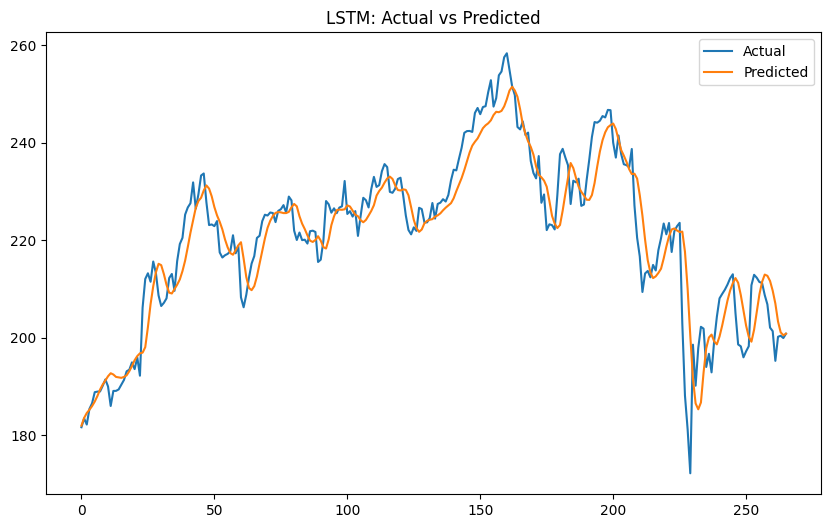

In [57]:
rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
mae = mean_absolute_error(y_true_inv, y_pred_inv)
r2 = r2_score(y_true_inv, y_pred_inv)

print(f"RMSE: {rmse:.4f}")
print(f"MAE : {mae:.4f}")
print(f"R²  : {r2:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(y_true_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("LSTM: Actual vs Predicted")
plt.legend()
plt.show()


In [60]:
MODEL_PATH = "../models/lstm_regressor.pth"
torch.save(model.state_dict(), MODEL_PATH)
print(f"Model saved at {MODEL_PATH}")

Model saved at ../models/lstm_regressor.pth


In [61]:
model_loaded = LSTMRegressor(input_size=INPUT_SIZE, hidden_size=64)
model_loaded.load_state_dict(torch.load(MODEL_PATH))
model_loaded.eval()
print("Model loaded successfully.")

Model loaded successfully.


In [62]:
predictions = []

with torch.no_grad():
    for X_batch, _ in test_loader:
        preds = model_loaded(X_batch)
        predictions.append(preds.numpy())

y_pred = np.concatenate(predictions).flatten()
y_true = y_test_tensor.numpy().flatten()

min_c, max_c = scaler.data_min_[0], scaler.data_max_[0]
y_pred_inv = y_pred * (max_c - min_c) + min_c
y_true_inv = y_true * (max_c - min_c) + min_c


In [63]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
mae = mean_absolute_error(y_true_inv, y_pred_inv)
r2 = r2_score(y_true_inv, y_pred_inv)

print(f"✅ RMSE: {rmse:.4f}")
print(f"✅ MAE : {mae:.4f}")
print(f"✅ R²  : {r2:.4f}")


✅ RMSE: 6.2834
✅ MAE : 4.5347
✅ R²  : 0.8651


In [64]:
def predict_future_prices(model_path, symbol="AAPL", days_to_predict=30, seq_length=30):

    end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
    start_date = (pd.Timestamp.now() - pd.Timedelta(days=365)).strftime('%Y-%m-%d')
    
    print(f"Downloading recent data for {symbol}...")
    recent_data = yf.download(symbol, start=start_date, end=end_date)
    
    df = recent_data[['Close', 'High', 'Low', 'Open', 'Volume']].copy()
    df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
    
    for lag in [1, 2, 3, 7]:
        df[f'Close_lag_{lag}'] = df['Close'].shift(lag)
    
    df['Close_rolling_mean_7'] = df['Close'].rolling(7).mean()
    df['Volume_rolling_mean_7'] = df['Volume'].rolling(7).mean()
    df = df.fillna(0)
    
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(df.astype(float))
    
    last_sequence = scaled_data[-seq_length:]
    
    input_size = df.shape[1]
    model = LSTMRegressor(input_size=input_size, hidden_size=64)
    model.load_state_dict(torch.load(model_path))
    model.eval()
    
    predictions = []
    current_sequence = last_sequence.copy()
    
    print(f"Predicting {days_to_predict} future prices...")
    
    with torch.no_grad():
        for day in range(days_to_predict):
            input_tensor = torch.tensor(current_sequence, dtype=torch.float32).unsqueeze(0)
            
            pred = model(input_tensor).item()
            predictions.append(pred)
            

            new_row = np.zeros(input_size)
            new_row[0] = pred  
            
            current_sequence = np.roll(current_sequence, -1, axis=0)
            current_sequence[-1] = new_row
    
    min_c, max_c = scaler.data_min_[0], scaler.data_max_[0]
    predictions_inv = np.array(predictions) * (max_c - min_c) + min_c
    
    last_date = recent_data.index[-1]
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=days_to_predict, freq='D')
    
    results = {
        'symbol': symbol,
        'predictions': predictions_inv,
        'dates': future_dates,
        'last_actual_price': df['Close'].iloc[-1],
        'predicted_change': predictions_inv[-1] - df['Close'].iloc[-1],
        'predicted_change_pct': ((predictions_inv[-1] - df['Close'].iloc[-1]) / df['Close'].iloc[-1]) * 100
    }
    
    return results

def display_predictions(results):
    symbol = results['symbol']
    predictions = results['predictions']
    dates = results['dates']
    last_price = results['last_actual_price']
    change = results['predicted_change']
    change_pct = results['predicted_change_pct']
    
    print(f"\n📈 {symbol} Stock Price Predictions")
    print("=" * 50)
    print(f"Last Actual Price: ${last_price:.2f}")
    print(f"Predicted Price ({dates[-1].strftime('%Y-%m-%d')}): ${predictions[-1]:.2f}")
    print(f"Predicted Change: ${change:.2f} ({change_pct:.2f}%)")
    print("\nDetailed Predictions:")
    print("-" * 30)
    
    for date, price in zip(dates[:10], predictions[:10]):  
        print(f"{date.strftime('%Y-%m-%d')}: ${price:.2f}")
    
    if len(predictions) > 10:
        print("...")
        print(f"{dates[-1].strftime('%Y-%m-%d')}: ${predictions[-1]:.2f}")

[*********************100%***********************]  1 of 1 completed

Predicting 30 future prices...

📈 AAPL Stock Price Predictions
Last Actual Price: $196.45
Predicted Price (2025-07-13): $170.31
Predicted Change: $-26.14 (-13.30%)

Detailed Predictions:
------------------------------
2025-06-14: $204.77
2025-06-15: $198.32
2025-06-16: $191.32
2025-06-17: $185.37
2025-06-18: $180.85
2025-06-19: $177.63
2025-06-20: $175.41
2025-06-21: $173.90
2025-06-22: $172.87
2025-06-23: $172.17
...
2025-07-13: $170.31


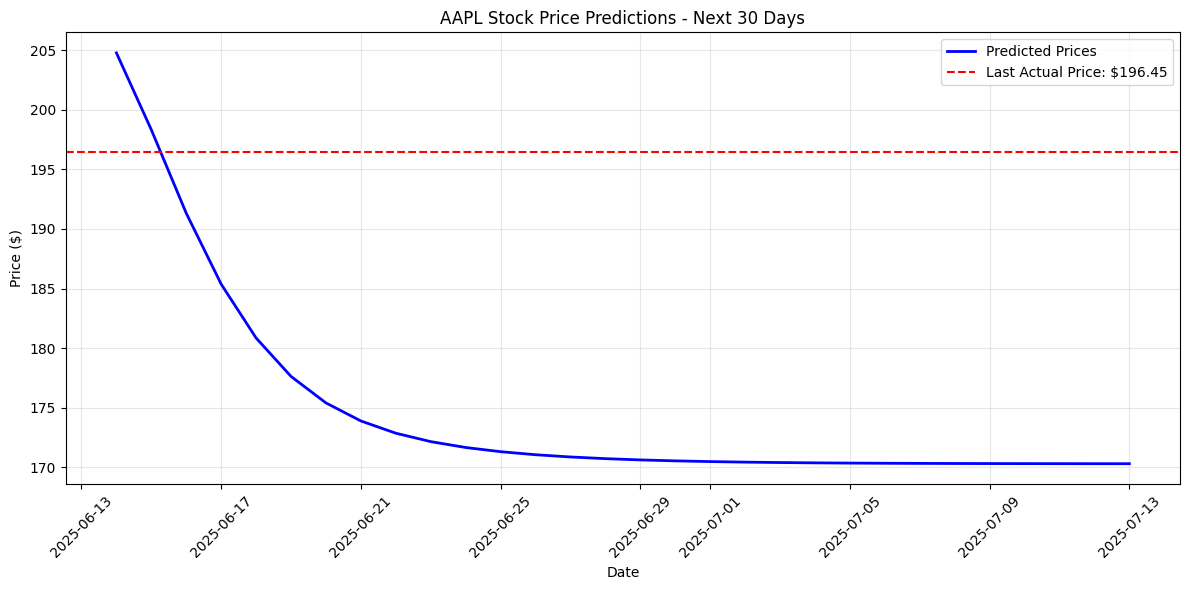

In [65]:
if __name__ == "__main__":
    results = predict_future_prices(
        model_path="../models/lstm_regressor.pth",
        symbol="AAPL",
        days_to_predict=30
    )
    
    display_predictions(results)    
    
    plt.figure(figsize=(12, 6))
    plt.plot(results['dates'], results['predictions'], 'b-', label='Predicted Prices', linewidth=2)
    plt.axhline(y=results['last_actual_price'], color='r', linestyle='--', 
                label=f'Last Actual Price: ${results["last_actual_price"]:.2f}')
    plt.title(f'{results["symbol"]} Stock Price Predictions - Next 30 Days')
    plt.xlabel('Date')
    plt.ylabel('Price ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()